In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [153]:
# import dataset
paris_weekdays = pd.read_csv(r'D:\Study Material\ML & DL\Data\Airbnb price\paris_weekdays.csv')
paris_weekends = pd.read_csv(r'D:\Study Material\ML & DL\Data\Airbnb price\paris_weekends.csv')

In [154]:
# dataset info (weekdays)
paris_weekdays.info() 
paris_weekdays.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3130 non-null   int64  
 1   realSum                     3130 non-null   float64
 2   room_type                   3130 non-null   object 
 3   room_shared                 3130 non-null   bool   
 4   room_private                3130 non-null   bool   
 5   person_capacity             3130 non-null   float64
 6   host_is_superhost           3130 non-null   bool   
 7   multi                       3130 non-null   int64  
 8   biz                         3130 non-null   int64  
 9   cleanliness_rating          3130 non-null   float64
 10  guest_satisfaction_overall  3130 non-null   float64
 11  bedrooms                    3130 non-null   int64  
 12  dist                        3130 non-null   float64
 13  metro_dist                  3130 

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [155]:
print(paris_weekdays.room_type.value_counts()) 

Entire home/apt    2325
Private room        758
Shared room          47
Name: room_type, dtype: int64


In [156]:
paris_weekdays.room_type = pd.factorize(paris_weekdays.room_type)[0]

cols = ['room_shared', 'room_private', 'host_is_superhost']
for col in cols:
    paris_weekdays[cols] = np.array(paris_weekdays[cols], dtype = 'int8')

In [202]:
paris_weekdays.describe().T

,count,mean,std,min,25%,50%,75%,max
realSum,3130.0,5.826632,0.521776,4.529792,5.480654,5.763714,6.138728,9.707814
room_type,3130.0,0.772843,0.453491,0.000000,1.000000,1.000000,1.000000,2.000000
room_shared,3130.0,0.015016,0.121636,0.000000,0.000000,0.000000,0.000000,1.000000
room_private,3130.0,0.242173,0.428467,0.000000,0.000000,0.000000,0.000000,1.000000
person_capacity,3130.0,2.947284,1.225632,2.000000,2.000000,2.000000,4.000000,6.000000
host_is_superhost,3130.0,0.137061,0.343966,0.000000,0.000000,0.000000,0.000000,1.000000
multi,3130.0,0.224920,0.417596,0.000000,0.000000,0.000000,0.000000,1.000000
biz,3130.0,0.258147,0.437685,0.000000,0.000000,0.000000,1.000000,1.000000
cleanliness_rating,3130.0,9.253994,0.987793,2.000000,9.000000,9.000000,10.000000,10.000000
guest_satisfaction_overall,3130.0,4.513584,0.127201,2.995732,4.488636,4.543295,4.584967,4.605170


In [158]:
# drop columns
paris_weekdays.drop(['Unnamed: 0'], axis = 1, inplace = True)

<AxesSubplot:>

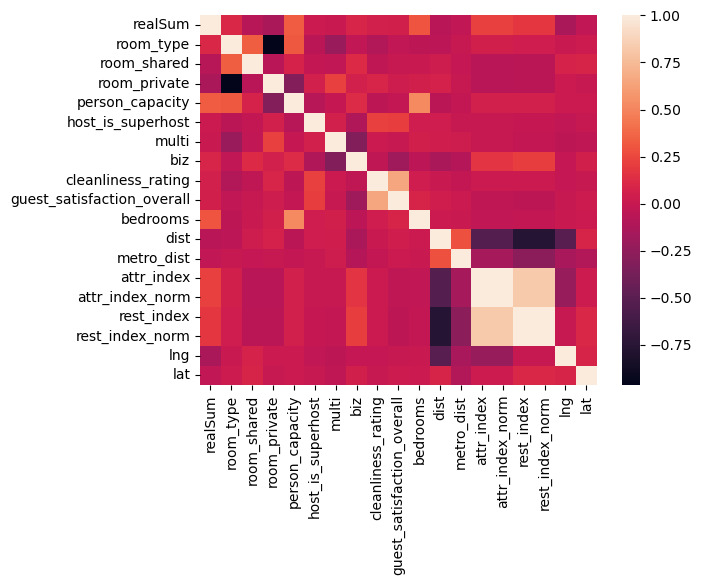

In [159]:
# heatmap
sns.heatmap(paris_weekdays.corr())

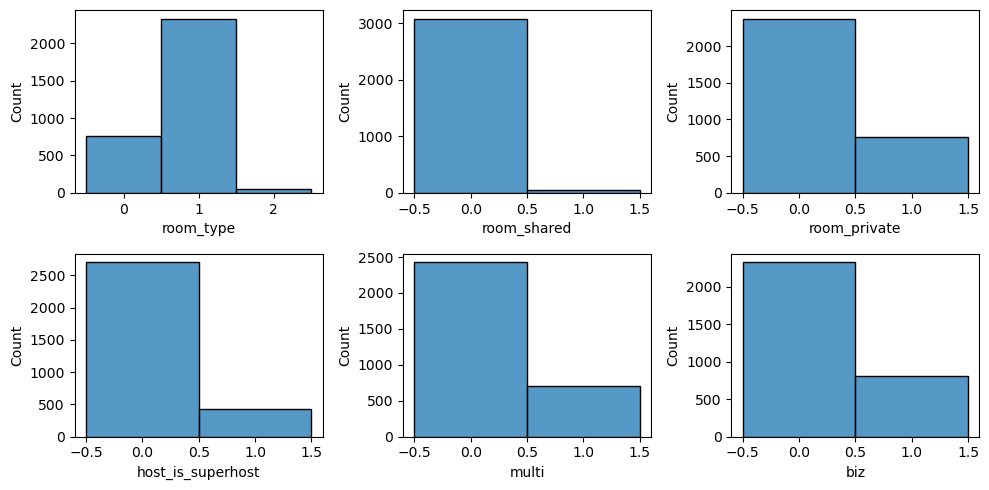

In [199]:
# univariate data
cols = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']

fig, ax = plt.subplots(2, 3, figsize = (10, 5))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(paris_weekdays[col], discrete = True)
plt.tight_layout() 
plt.show()

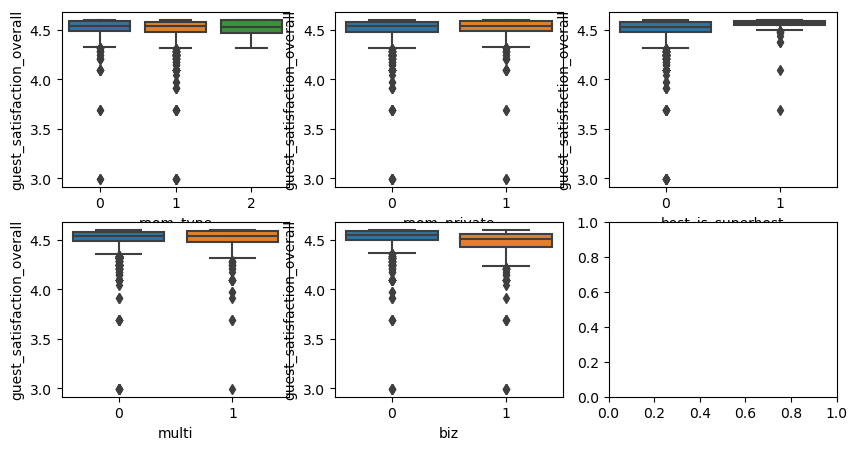

In [206]:
# overall statisfaction over room characteristic
fig, ax = plt.subplots(2, 3, figsize = (10, 5))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x = col, y = 'guest_satisfaction_overall', data = paris_weekdays)

In [213]:
cols = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']

for col in cols:
    print(paris_weekdays[col].value_counts())
    print(paris_weekdays.groupby(col)['guest_satisfaction_overall'].min())
    print('\n')

1    2325
0     758
2      47
Name: room_type, dtype: int64
room_type
0    2.995732
1    2.995732
2    4.317488
Name: guest_satisfaction_overall, dtype: float64


0    3083
1      47
Name: room_shared, dtype: int64
room_shared
0    2.995732
1    4.317488
Name: guest_satisfaction_overall, dtype: float64


0    2372
1     758
Name: room_private, dtype: int64
room_private
0    2.995732
1    2.995732
Name: guest_satisfaction_overall, dtype: float64


0    2701
1     429
Name: host_is_superhost, dtype: int64
host_is_superhost
0    2.995732
1    3.688879
Name: guest_satisfaction_overall, dtype: float64


0    2426
1     704
Name: multi, dtype: int64
multi
0    2.995732
1    2.995732
Name: guest_satisfaction_overall, dtype: float64


0    2322
1     808
Name: biz, dtype: int64
biz
0    2.995732
1    2.995732
Name: guest_satisfaction_overall, dtype: float64




<AxesSubplot:xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

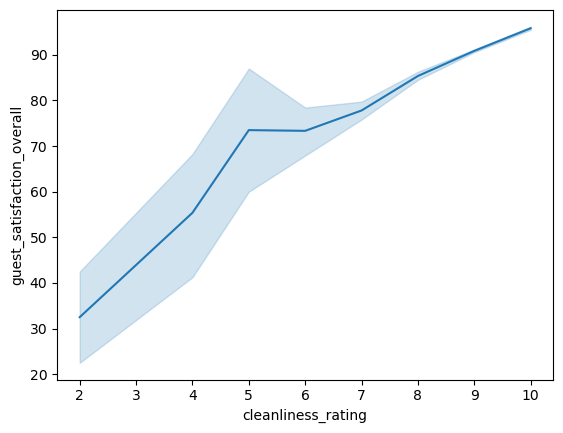

In [161]:
# overall statisfaction over cleanliness
sns.lineplot(x = 'cleanliness_rating', y = 'guest_satisfaction_overall', data = paris_weekdays)

2.0    1746
4.0     775
3.0     302
6.0     192
5.0     115
Name: person_capacity, dtype: int64


<AxesSubplot:ylabel='person_capacity'>

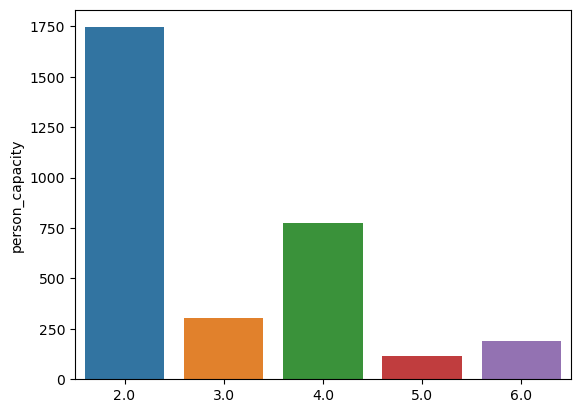

In [163]:
no_person = paris_weekdays.person_capacity.value_counts()
print(no_person)

sns.barplot(x = np.array((no_person.index), dtype='float64'), y = no_person)

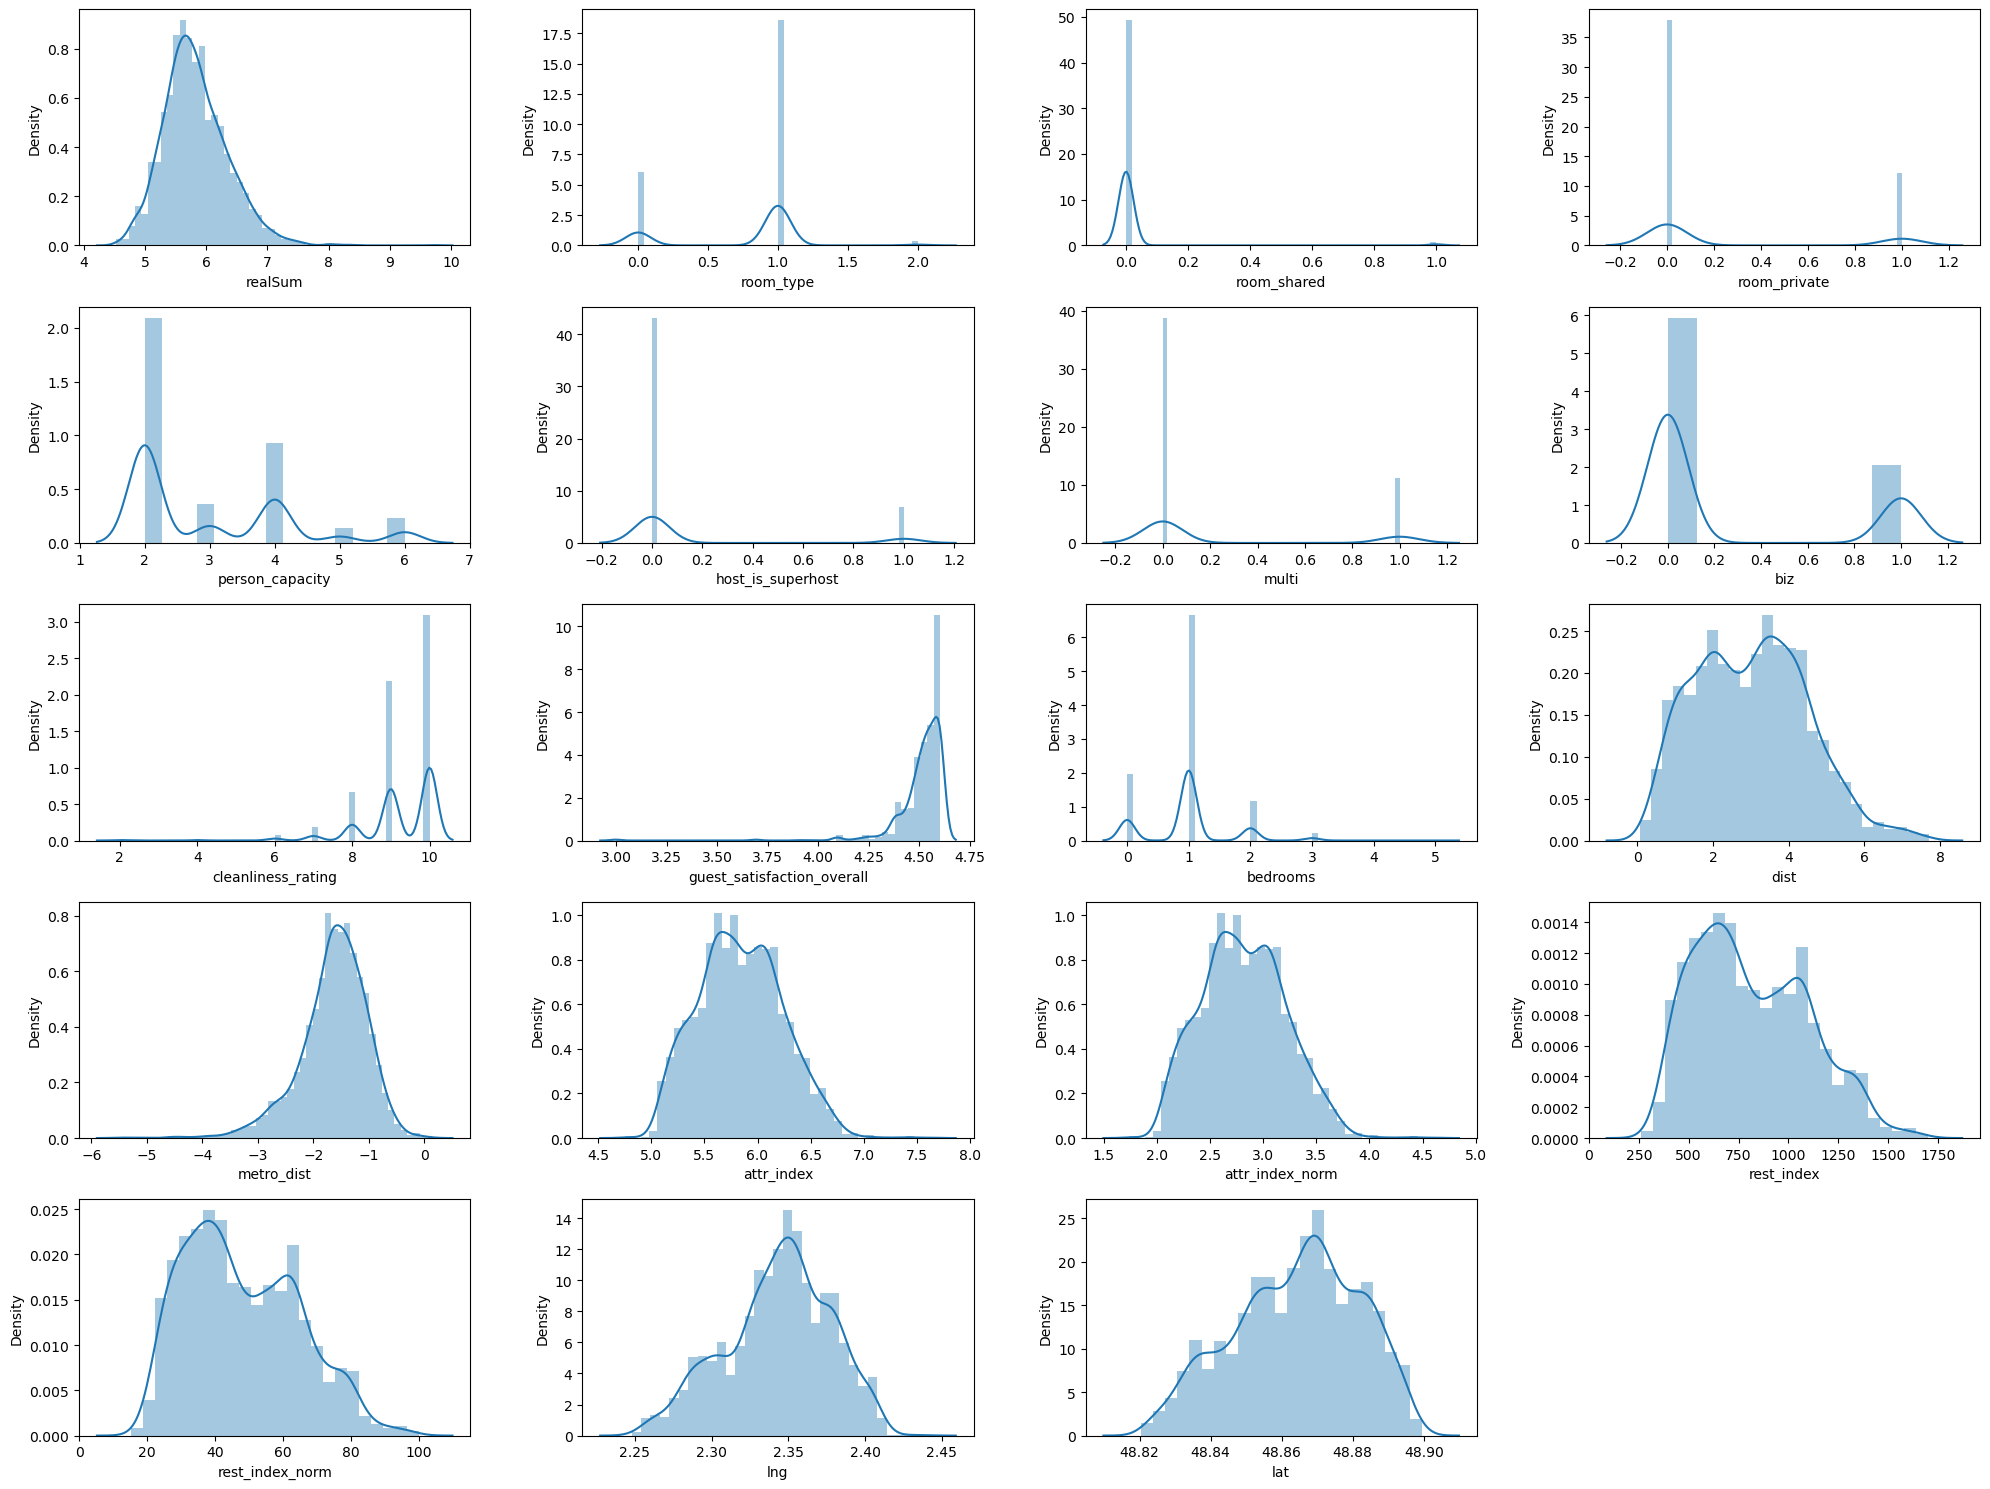

In [167]:
# eda and preprocess
# data distribution
fig, ax = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(paris_weekdays.columns):
    plt.subplot(5, 4, i+1)
    sns.distplot(paris_weekdays[col])
plt.tight_layout()
plt.show() 

In [165]:
# transformation
logs = ['realSum', 'metro_dist', 'attr_index', 'attr_index_norm', 'guest_satisfaction_overall']
for col in logs:
    paris_weekdays[col] = np.log(paris_weekdays[col]) 

In [170]:
# scaling
scaler = MinMaxScaler()
scaler.fit(paris_weekdays)
scaler.transform(paris_weekdays)

scaled_df = pd.DataFrame(scaler.transform(paris_weekdays), columns = paris_weekdays.columns)
scaled_df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0.224238,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000,0.981075,0.2,0.082319,0.685660,0.520544,0.520544,0.665191,0.665191,0.555660,0.537325
1,0.219001,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000,0.981075,0.2,0.265777,0.581519,0.702080,0.702080,0.514053,0.514053,0.401028,0.489327
2,0.159074,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000,0.961555,0.2,0.423310,0.719474,0.466975,0.466975,0.446362,0.446362,0.363169,0.688013
3,0.226052,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.875,0.941401,0.2,0.062370,0.687727,0.536086,0.536086,0.651694,0.651694,0.566934,0.514336
4,0.189906,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.625,0.876695,0.2,0.147582,0.575425,0.436177,0.436177,0.562718,0.562718,0.583451,0.583554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,0.176763,0.5,0.0,0.0,0.5,0.0,0.0,0.0,1.000,0.987447,0.2,0.456911,0.646123,0.162576,0.162576,0.149451,0.149451,0.800273,0.387142
3126,0.170042,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.875,0.927593,0.2,0.541609,0.732700,0.137616,0.137616,0.102490,0.102490,0.802894,0.716433
3127,0.349954,0.5,0.0,0.0,1.0,1.0,0.0,0.0,1.000,0.974636,0.6,0.555619,0.765381,0.148661,0.148661,0.112288,0.112288,0.762729,0.812808
3128,0.148798,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.875,0.954909,0.2,0.369443,0.723891,0.245219,0.245219,0.238209,0.238209,0.703267,0.678540


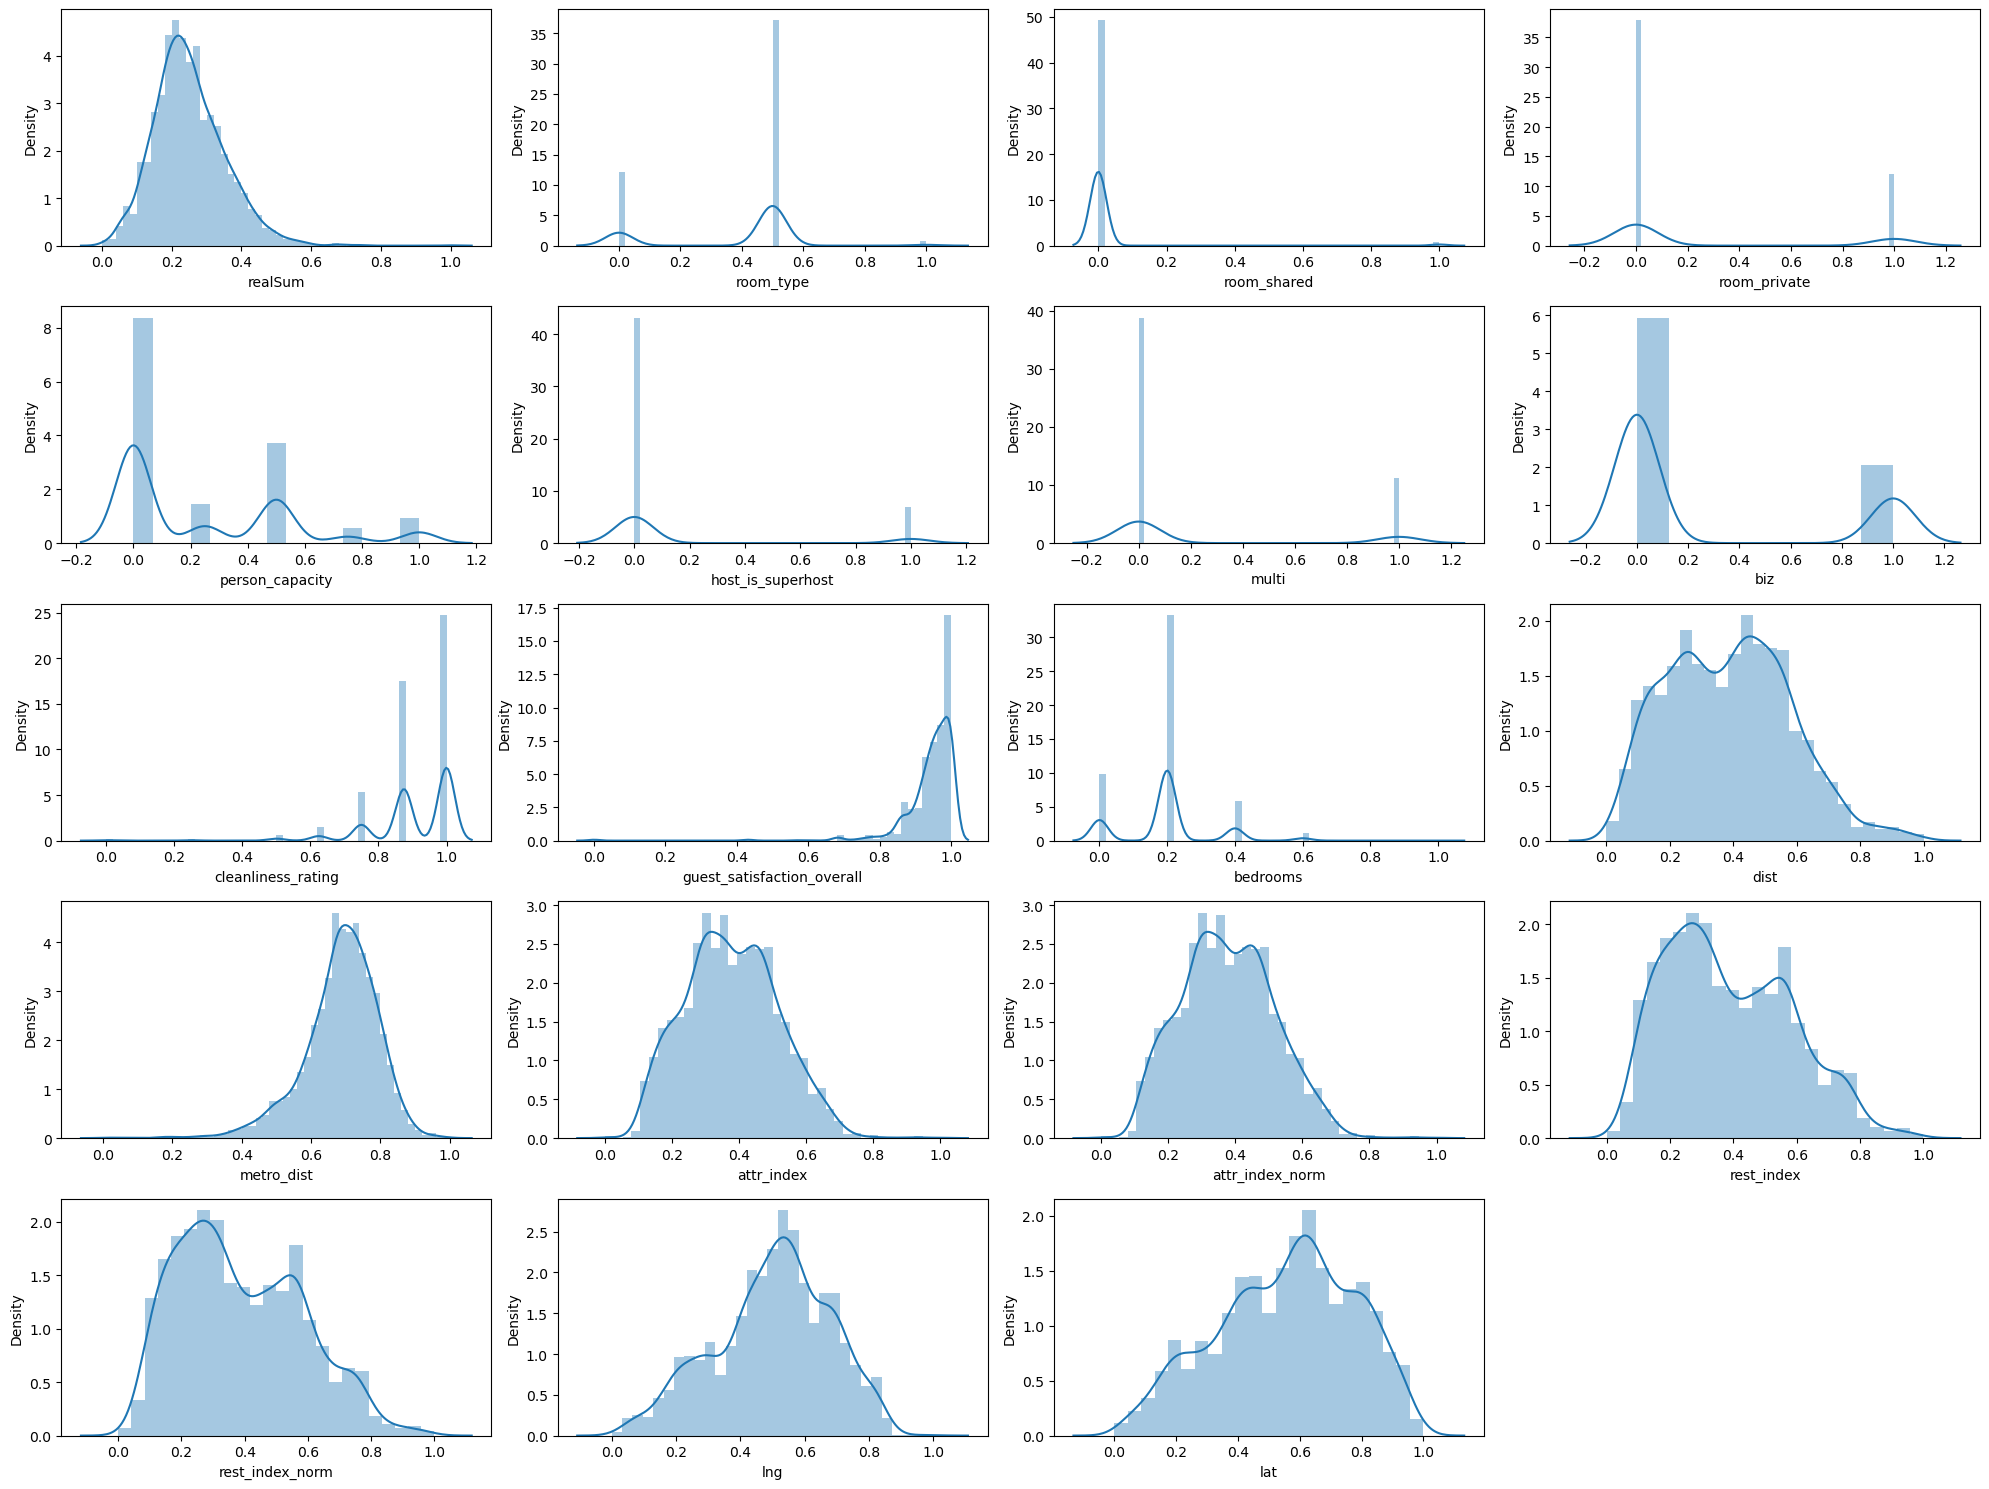

In [171]:
# eda and preprocess
# data distribution
fig, ax = plt.subplots(6, 3, figsize = (20, 15))
for i, col in enumerate(scaled_df.columns):
    plt.subplot(5, 4, i+1)
    sns.distplot(scaled_df[col])
plt.tight_layout()
plt.show() 

In [172]:
y = scaled_df.pop('realSum')
x = scaled_df

In [173]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     293.0
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:43:27   Log-Likelihood:                 4119.9
No. Observations:                3130   AIC:                            -8208.
Df Residuals:                    3114   BIC:                            -8111.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [175]:
# initiate lr object (base model)
lr = LinearRegression()

In [176]:
# fit model 
lr.fit(x_train, y_train)

LinearRegression()

In [177]:
# prediction
y_pred = lr.predict(x_test)

In [182]:
# evaluation
print(f'Mean_Squared_Error: %.2f' % mean_squared_error(y_test, y_pred))
print(f'R2_Score: %.2f' % r2_score(y_test, y_pred))

Mean_Squared_Error: 0.11
R2_Score: 0.55
